# Extrapolation

- Be careful.

- We need to have a good physical motivation to extrapolate data.


- It can be done via:

1. Regression -> care about physics

2. Interpolation ->don't care about physics

### Example 1:

Let's go back to our data file for the free-fall experiment.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read_csv returns a DataFrame, which is two-dimensional data structure with labeled axes.

data = pd.read_csv("../DATA/data_freefall.csv")
print(data) # Uncomment to print data

# To get the data from specific columns, you can use their respective keys, e.g.:

time = np.array(data["Time (s)"])
position = np.array(data["Position (m)"])

    Time (s)  Position (m)
0        0.0           0.0
1        0.5           2.0
2        1.0           5.2
3        1.5           9.8
4        2.0          19.7
5        2.5          31.2
6        3.0          44.4
7        3.5          57.8
8        4.0          80.8
9        4.5         100.4
10       5.0         121.1


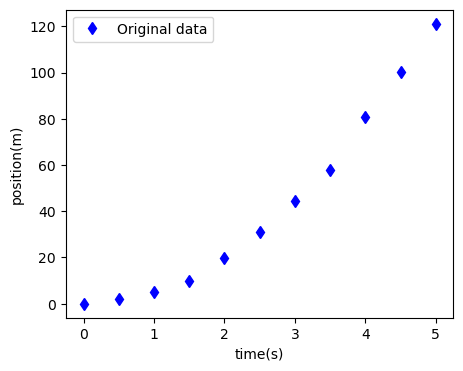

In [4]:
# And now we plot
plt.figure(figsize=(5,4))

plt.plot(time, position, color='blue', marker = "d", linestyle=" ", label="Original data")

plt.xlabel('time(s)')
plt.ylabel('position(m)')

plt.legend()

plt.show()

### Regression:

Remember regressions are based on physically motivated models.

In [5]:
# Import the scipy library

import scipy.optimize as opt

In [6]:
# Define the model function to fit the data

def fit_model(t_values, a):
    """
    Function to define model to fut experimental data.
    In this case we use a linear polynomial
    Inputs: t_values (data vector)
    Output: y_values (linear finction)
    """
    y_values = a * t_values**2
    
    return y_values

In [7]:
# Call the curve_fit() function
coef, cova = opt.curve_fit(fit_model, time, position)

print(coef)

[4.90275925]


In [8]:
# Evaluate the model
#Evaluate the model in the same axis (0.5)s

position_fit = fit_model(time, coef[0])

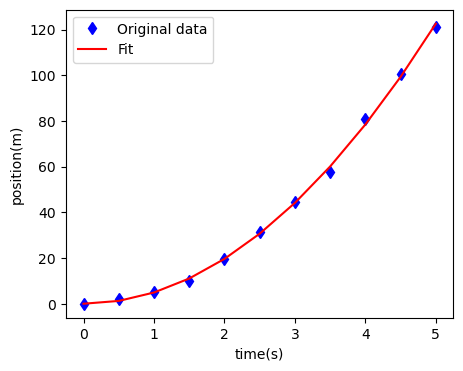

In [9]:
# And now we plot
plt.figure(figsize=(5,4))

plt.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(time,position_fit,color='red', linestyle="-", label="Fit")

plt.xlabel('time(s)')
plt.ylabel('position(m)')

plt.legend()

plt.show()

### Informed extrapolation:

In [10]:
# Extrapolate data to t=10s.
time_ext = 10.

# Evaluate the model -> Extrapolated position
position_ext = fit_model(time_ext, coef[0])

print(position_ext)

# Generate a new vector for time
new_time = np.linspace(0., 10, 100)

# Evaluate the model
new_posi = fit_model(new_time, coef[0])

print(new_posi.shape)

490.27592468407073
(100,)


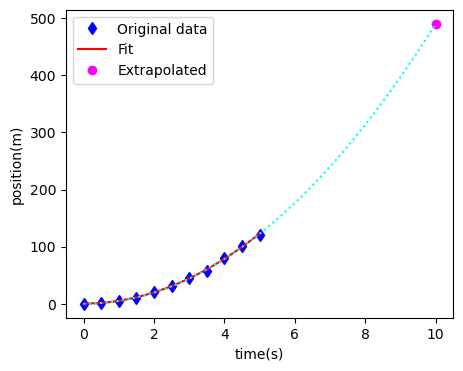

In [11]:
# And now we plot
plt.figure(figsize=(5,4))

plt.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(time,position_fit,color='red', linestyle="-", label="Fit")
plt.plot(time_ext, position_ext, color = "magenta", marker = "o", linestyle=" ", label="Extrapolated")

plt.plot(new_time,new_posi,color='aqua', linestyle=":")

plt.xlabel('time(s)')
plt.ylabel('position(m)')

plt.legend()

plt.show()

### Example 2:

Using interpolation methods (This may not be physical).

In [12]:
from scipy.interpolate import lagrange

In [13]:
# Lagrange interpolation
f_lag = lagrange(time, position)

# New time axis
time_new = np.linspace(0, 5, num=101, endpoint=True)

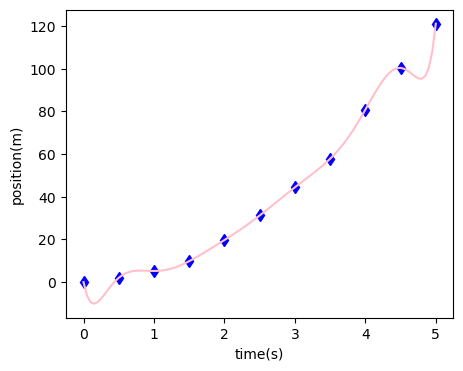

In [14]:
# And now we plot
plt.figure(figsize=(5,4))

plt.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(time_new, f_lag(time_new),color='pink', linestyle="-", label="Fit")

plt.xlabel('time(s)')
plt.ylabel('position(m)')

plt.show()

In [15]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [16]:
# Call function:
ext_data = InterpolatedUnivariateSpline(time,position, k=3)

# New axis:
time_new2 = np.linspace(0, 10, num=101, endpoint=True)

# Evaluate our extrapolated function using the new axis:
position_ext2 = ext_data(time_new2)

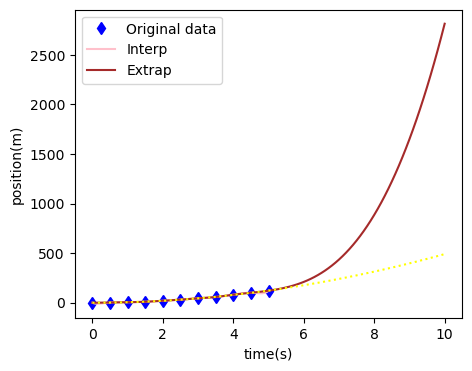

In [17]:
# And now we plot
fig, ax = plt.subplots(figsize=(5,4))

plt.plot(time,position,color='blue', marker = "d", linestyle=" ", label="Original data")
plt.plot(time_new, f_lag(time_new),color='pink', linestyle="-", label="Interp")
plt.plot(time_new2, position_ext2, color='brown', linestyle="-", label="Extrap")

plt.plot(new_time,new_posi,color='yellow', linestyle=":")

plt.xlabel('time(s)')
plt.ylabel('position(m)')

plt.legend()

plt.show()